<a href="https://colab.research.google.com/github/siahay/Portfolio/blob/main/NSMA_exam_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NSMA exam 2024

*Can sentiment on r/WallStreetBets predict stock price movement?*

https://www.kaggle.com/datasets/gpreda/reddit-wallstreetsbets-posts

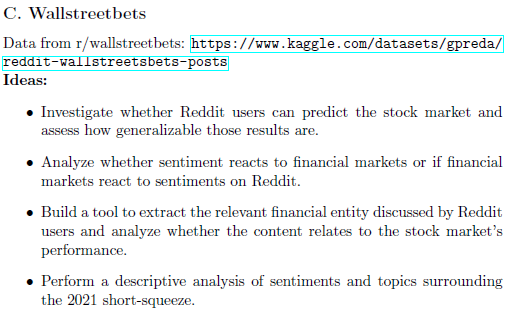

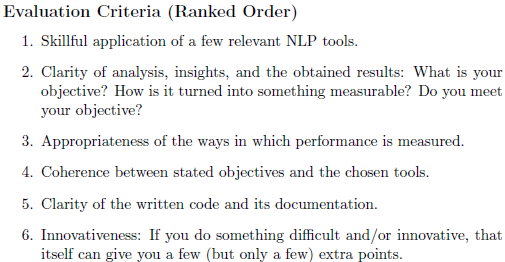

# Data exploration and preparation

## Exploration

In [4]:
# imports
import pandas as pd

In [68]:
# import dataset
df = pd.read_csv('reddit_wsb.csv')

In [69]:
# check datatypes in each column
df.dtypes

,0
title,object
score,int64
id,object
url,object
comms_num,int64
created,float64
body,object
timestamp,object


In [70]:
# check for missing or empty values
for column in df.columns:
    missing = df[column].isnull().sum()
    empty = (df[column] == '').sum()
    total_issues = missing + empty
    print(f"Column: {column} - Missing: {missing}, Empty: {empty}, Total Issues: {total_issues}")

Column: title - Missing: 0, Empty: 0, Total Issues: 0
Column: score - Missing: 0, Empty: 0, Total Issues: 0
Column: id - Missing: 0, Empty: 0, Total Issues: 0
Column: url - Missing: 0, Empty: 0, Total Issues: 0
Column: comms_num - Missing: 0, Empty: 0, Total Issues: 0
Column: created - Missing: 0, Empty: 0, Total Issues: 0
Column: body - Missing: 28449, Empty: 0, Total Issues: 28449
Column: timestamp - Missing: 0, Empty: 0, Total Issues: 0


In [71]:
# some posts have title but not body
## Do these posts have different sentiment scores or engagement metrics (e.g., upvotes, comments)?
## posts without bodies have different sentiment distributions or predictive power compared to those with bodies?

In [72]:
import matplotlib.pyplot as plt

In [73]:
# significant event occured on the 29-01-2024

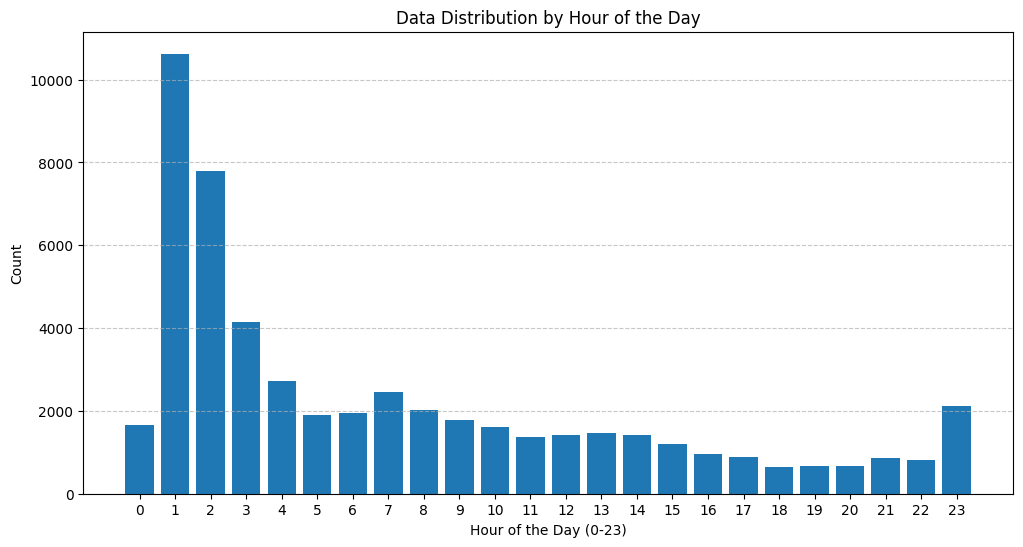

In [74]:
# viualization 2
# data distributed by time of day

# Ensure the timestamp column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the hour of the day
df['hour'] = df['timestamp'].dt.hour

# Group by hour and count occurrences
hourly_counts = df['hour'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values, width=0.8)
plt.title('Data Distribution by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Count')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


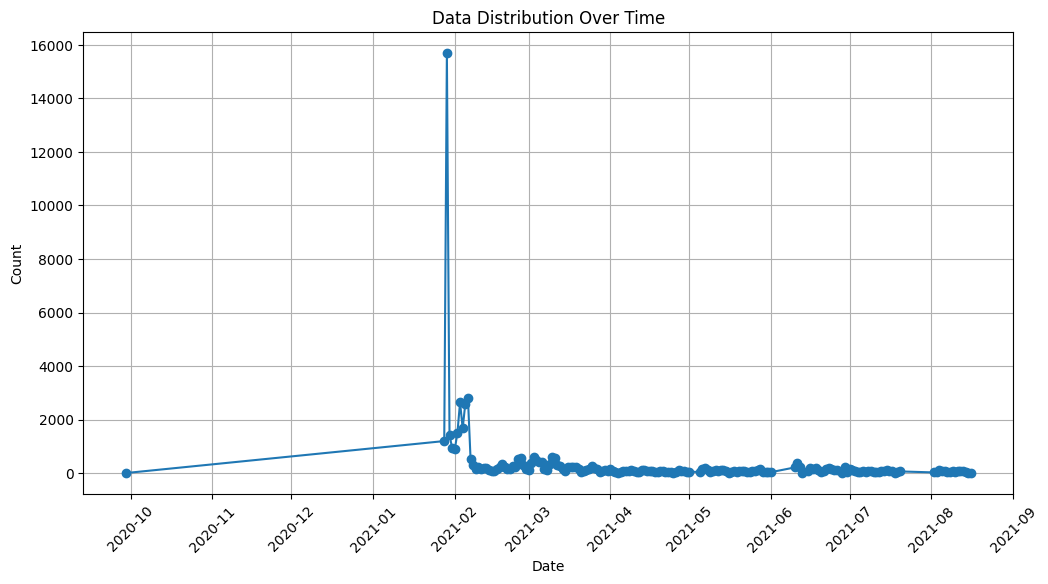

In [75]:
# visualization 1
# data distributed by day

df['date'] = df['timestamp'].dt.date
daily_counts = df.groupby('date').size()

# Plot the data distribution
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Data Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Cleaning and preprocessing

### Handling noise

In [76]:
pip install emoji unidecode

In [77]:
import string
from unidecode import unidecode
import emoji

In [78]:
# define function to
# remove emojis, special characters, punctuation
# lowercase, normalize whitespace, unicode normalization

In [79]:
def clean_strings(x):
    x = x.lower()  # Convert to lowercase
    x = emoji.replace_emoji(x, "")  # Remove emojis
    x = x.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    x = unidecode(x)  # Remove accents and special characters
    x = x.strip()  # Remove leading and trailing whitespace
    x = " ".join(x.split())  # Remove extra spaces
    return x

# Test the function
sample_text = "It's not about the money, it's about sending a message. 🚀💎🙌"
cleaned_text = clean_strings(sample_text)
print(cleaned_text)

its not about the money its about sending a message


In [80]:
# apply function to 'title' and 'body' column
df['title'] = df['title'].apply(clean_strings)
df['body'] = df['body'].astype(str).apply(clean_strings) # turns empty cell to Nan


In [81]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,hour,date
0,its not about the money its about sending a me...,55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,nan,2021-01-28 21:37:41,21,2021-01-28
1,math professor scott steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,nan,2021-01-28 21:32:10,21,2021-01-28
2,exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,"the ceo of nasdaq pushed to halt trading ""to g...",2021-01-28 21:30:35,21,2021-01-28
3,new sec filing for gme can someone less retard...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,nan,2021-01-28 21:28:57,21,2021-01-28
4,not to distract from gme just thought our amc ...,71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,nan,2021-01-28 21:26:56,21,2021-01-28


### Handling stopwords

In [82]:
import spacy

In [83]:
# import language model
nlp = spacy.load("en_core_web_sm")

In [84]:
text = "This is a simple example to demonstrate how to remove stopwords using spaCy."
doc = nlp(text)
filtered_tokens = [token.text for token in doc if not token.is_stop]
filtered_text = " ".join(filtered_tokens)
print("Filtered Text:", filtered_text)


Filtered Text: simple example demonstrate remove stopwords spaCy .


In [85]:
# define a function to remove stopwords
# Batch processing with nlp.pipe
def remove_stopwords_batch(texts):
    filtered_texts = []
    for doc in nlp.pipe(texts, batch_size=1000):
        filtered_tokens = [token.text for token in doc if not token.is_stop]
        filtered_texts.append(" ".join(filtered_tokens))
    return filtered_texts

In [86]:
# Apply the batch processing function
df['title'] = remove_stopwords_batch(df['title'].tolist())
df['body'] = remove_stopwords_batch(df['body'].tolist())

#16 minutes

In [87]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,hour,date
0,money sending message,55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,nan,2021-01-28 21:37:41,21,2021-01-28
1,math professor scott steiner says numbers spel...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,nan,2021-01-28 21:32:10,21,2021-01-28
2,exit system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,"ceo nasdaq pushed halt trading "" investors cha...",2021-01-28 21:30:35,21,2021-01-28
3,new sec filing gme retarded interpret,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,nan,2021-01-28 21:28:57,21,2021-01-28
4,distract gme thought amc brothers aware,71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,nan,2021-01-28 21:26:56,21,2021-01-28


### Tokenization and lemmatization

In [59]:
# define lemmatization function
## no need to tokenize afterwards becasur SpaCy inherently tokenizes the texk as part of its nlp pipeline

def lemmatize_text(text):
    # Process the text using SpaCy
    doc = nlp(text)
    # Join lemmatized tokens, ignoring punctuation or spaces
    return " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])


In [60]:
def lemmatize_text(text):
    # Process the texts as a batch
    docs = list(nlp.pipe(text))
    # Lemmatize each text and return the results
    return [
        " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])
        for doc in docs
    ]

In [88]:
def lemmatize_dataframe_column(df, column_name, nlp, batch_size=500):
    # Extract the column as a list
    text_list = df[column_name].dropna().astype(str).tolist()

    # Process the texts in batches
    docs = list(nlp.pipe(text_list, batch_size=batch_size))

    # Lemmatize each text and return as a Series
    lemmatized_texts = [
        " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])
        for doc in docs
    ]

    # Replace original column with lemmatized results
    lemmatized_series = pd.Series(lemmatized_texts, index=df[column_name].dropna().index)
    return lemmatized_series

In [90]:
df["title"] = lemmatize_dataframe_column(df, "title", nlp)
# 1 m

In [89]:
df["body"] = lemmatize_dataframe_column(df, "body", nlp)
# 6 m

In [ ]:
#15 min vs. 6
df.head()

### Extract mentions of specific stock tickers

#### Cleaning stock data for reference later

In [8]:
import re
import json

In [9]:
# list of company tickers and names

# Load the JSON file into a dictionary
with open("company_tickers.json", "r") as file:
    json_data = json.load(file)

# Convert the dictionary to a pandas DataFrame
stocks = pd.DataFrame.from_dict(json_data, orient='index')

In [10]:
# remove tickers below 3 characters
stocks = stocks[stocks['ticker'].str.len() >= 3]

In [11]:
# remove  business entity suffixes from stock titles
def clean_title(title):
    # Remove specific terms like Inc., Corp., etc., and remove '.' and ',' globally
    title = re.sub(r'\b(Inc\.?|Corp\.?|Ltd\.?|LLC|PLC|Co\.?|L\.P\.?|Group)\b', '', title, flags=re.IGNORECASE)
    title = re.sub(r'[.,]', '', title)  # Remove any remaining '.' and ','
    return title.strip()

In [12]:
stocks['title'] = stocks['title'].apply(clean_title)
stocks["ticker"] = [ticker.lower() for ticker in stocks["ticker"]]
stocks["title"] = [title.lower() for title in stocks["title"]]

In [13]:
stocks

,cik_str,ticker,title
0,320193,aapl,apple
1,1045810,nvda,nvidia
2,789019,msft,microsoft
3,1018724,amzn,amazon com
4,1652044,googl,alphabet
...,...,...,...
10022,1835856,betrw,better home & finance holding
10023,1808377,lucyw,innovative eyewear
10024,320335,gl-pd,globe life
10025,1845437,npwr-wt,net power


#### Extracting mentions of ticker or stock

In [51]:
# extract tickers

import re
import pandas as pd

# Pre-compile the regex pattern once outside the function
def compile_ticker_pattern(valid_tickers):
    pattern = r'\b(?:' + '|'.join(map(re.escape, valid_tickers)) + r')\b'
    return re.compile(pattern)

# Vectorized function to extract tickers from a column
def extract_tickers_column(series, compiled_pattern):
    return series.fillna("").str.findall(compiled_pattern)

# Load or define the valid tickers
valid_tickers = stocks["ticker"].tolist()
compiled_pattern = compile_ticker_pattern(valid_tickers)

# Vectorized extraction for 'title' and 'body' columns
title_tickers = extract_tickers_column(df['title'], compiled_pattern)
body_tickers = extract_tickers_column(df['body'], compiled_pattern)

# Combine and deduplicate tickers for each row
df['extracted_tickers'] = (title_tickers + body_tickers).apply(lambda x: list(set(x)))

#MUCH FASTER THAN 32m

In [44]:
# extract titles

import re
import pandas as pd

# Function to compile a regex pattern using a list of valid titles
def compile_title_pattern(valid_titles):
    pattern = r'\b(?:' + '|'.join(map(re.escape, valid_titles)) + r')\b'
    return re.compile(pattern)

# Vectorized function to extract matches from a column based on a compiled regex
def extract_titles_column(series, compiled_pattern):
    return series.fillna("").str.findall(compiled_pattern)

# Load or define the valid titles
valid_stocks = stocks["title"].tolist()  # Use titles as valid entries
compiled_pattern = compile_title_pattern(valid_stocks)

# Vectorized extraction for 'title' and 'body' columns
title_matches = extract_titles_column(df['title'], compiled_pattern)
body_matches = extract_titles_column(df['body'], compiled_pattern)

# Combine and deduplicate titles for each row
df['extracted_titles'] = (title_matches + body_matches).apply(lambda x: list(set(x)))

In [50]:
df['extracted_tickers']

,extracted_tickers
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
53182,[]
53183,[]
53184,[]
53185,[]


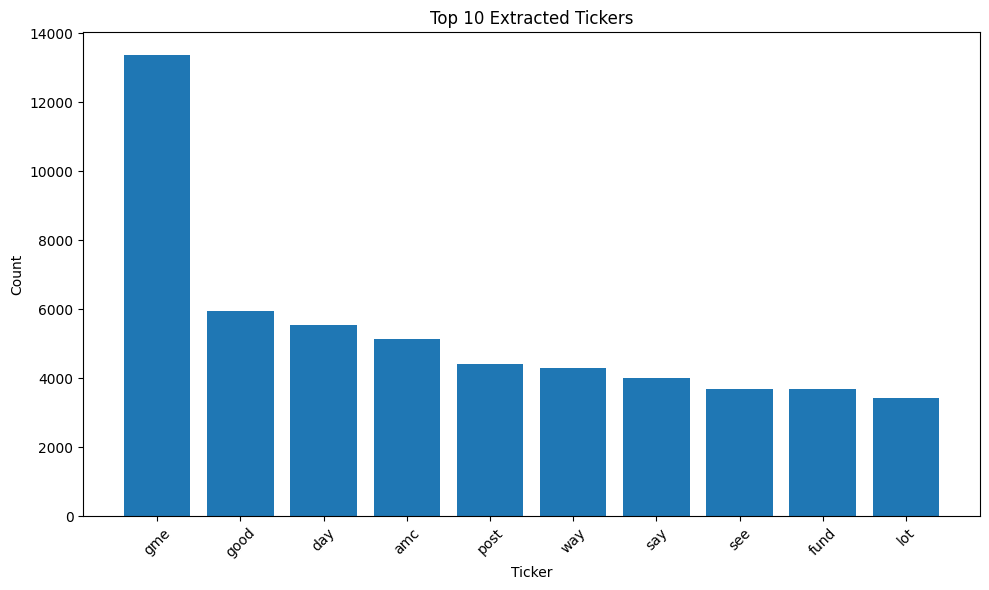

In [58]:
from collections import Counter
import matplotlib.pyplot as plt

# Ensure 'extracted_tickers' column contains strings before applying eval
df['extracted_tickers'] = df['extracted_tickers'].astype(str).apply(eval)

# Extract all tickers again
all_tickers = [ticker for sublist in df['extracted_tickers'] for ticker in sublist]

# Count the occurrences of each ticker
ticker_counts = Counter(all_tickers)

# Prepare data for visualization
top_tickers = ticker_counts.most_common(10)  # Top 10 most frequent tickers
tickers, counts = zip(*top_tickers)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(tickers, counts)
plt.title("Top 10 Extracted Tickers")
plt.xlabel("Ticker")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

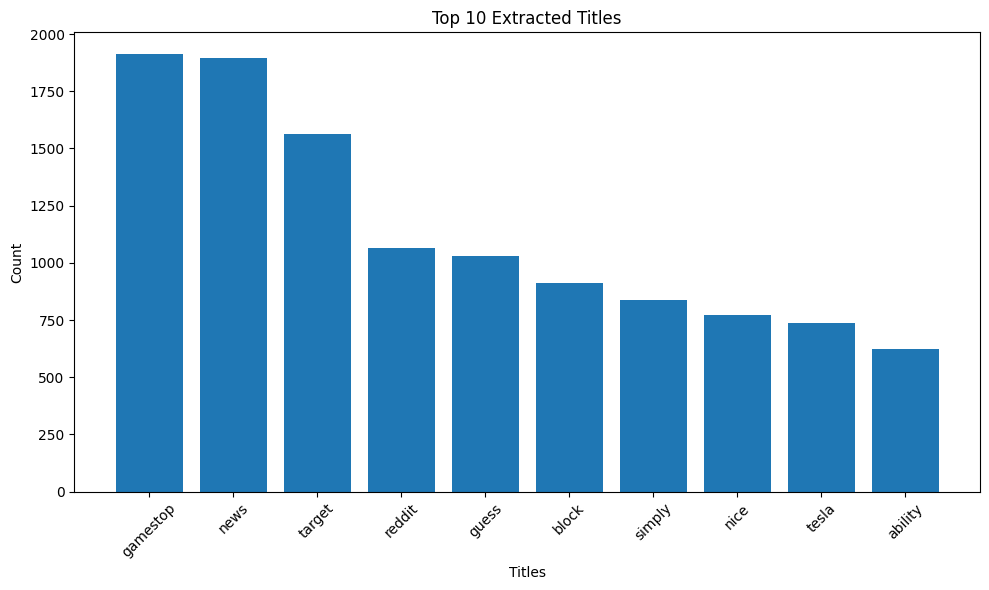

In [60]:
# Ensure 'extracted_titles' column contains strings before applying eval
df['extracted_titles'] = df['extracted_titles'].astype(str).apply(eval)

# Extract all titles
all_titles = [title for sublist in df['extracted_titles'] for title in sublist]

# Count the occurrences of each title
title_counts = Counter(all_titles)

# Prepare data for visualization
top_titles = title_counts.most_common(10)  # Top 10 most frequent titles
titles, counts = zip(*top_titles)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(titles, counts)
plt.title("Top 10 Extracted Titles")
plt.xlabel("Titles")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df["body"] = df["body"].fillna("[]")

## Sentiment analysis

In [63]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

In [8]:
df["body"] = df["body"].fillna("[]")


In [15]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm  # For the progress bar


# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="yiyanghkust/finbert-tone",  # Financial sentiment model
    tokenizer="yiyanghkust/finbert-tone",
    truncation=True,  # Automatically truncate inputs to fit the model
    max_length=512,   # Limit to 512 tokens
    device=-1         # CPU; set to device=0 for GPU
)

# Function to analyze sentiment in batches
def batch_sentiment_analysis(texts, batch_size=32):
    sentiments = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing Sentiment Batches"):
        batch = texts[i:i + batch_size]
        results = sentiment_pipeline(batch, truncation=True, max_length=512)
        for result in results:
            if result["label"] == "positive":
                sentiments.append(result["score"])
            elif result["label"] == "negative":
                sentiments.append(-result["score"])
            else:
                sentiments.append(0)  # Neutral sentiment
    return sentiments

# Apply batch sentiment analysis
df["sentiment"] = batch_sentiment_analysis(df["body"].tolist(), batch_size=64)

# Display the resulting DataFrame
df


Processing Sentiment Batches: 100%|██████████| 832/832 [5:00:12<00:00, 21.65s/it]


,Unnamed: 0.1,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,hour,date,extracted_tickers,mentioned_tickers,extracted_titles,sentiment
0,0,0,money send message,55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,[],2021-01-28 21:37:41,21,2021-01-28,[],[],[],0
1,1,1,math professor scott steiner say number spell ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,[],2021-01-28 21:32:10,21,2021-01-28,"['say', 'math']",[],['gamestop'],0
2,2,2,exit system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,ceo nasdaq push halt trading investor chance r...,2021-01-28 21:30:35,21,2021-01-28,"['gme', 'step', 'uber', 'fund', 'game', 'rig']",[],['nasdaq'],0
3,3,3,new sec filing gme retarded interpret,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,[],2021-01-28 21:28:57,21,2021-01-28,['gme'],[],[],0
4,4,4,distract gme think amc brother aware,71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,[],2021-01-28 21:26:56,21,2021-01-28,"['gme', 'amc']",[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53182,53182,53182,learn investigate sava fud spreader,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,tldr bitter scientist partner unethical journa...,2021-08-02 15:03:27,15,2021-08-02,"['job', 'edit', 'base', 'drug', 'san', 'talk',...",[],"['sound', 'target', 'cassava sciences', 'bioge...",0
53183,53183,53183,daily popular ticker thread august 02 2021 bab...,228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,daily hype thread shitposte maximum navigate w...,2021-08-02 15:01:03,15,2021-08-02,"['gme', 'baba', 'amd', 'gain', 'good']",[],['popular'],0
53184,53184,53184,hitler react market irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,[],2021-08-02 13:59:35,13,2021-08-02,[],[],[],0
53185,53185,53185,daily discussion thread august 02 2021,338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,daily trading discussion thread shitposte mini...,2021-08-02 13:00:16,13,2021-08-02,"['bar', 'gain', 'good']",[],[],0


In [1]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm

# Load model and tokenizer
model_name = "tabularisai/robust-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

def predict_sentiments_in_batches(texts, batch_size=32):
    """Predict sentiments in batches for a list of texts."""
    sentiments = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing Sentiments in Batches"):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)

        probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_classes = torch.argmax(probabilities, dim=-1).tolist()

        sentiment_map = {0: "Very Negative", 1: "Negative", 2: "Neutral", 3: "Positive", 4: "Very Positive"}
        batch_sentiments = [sentiment_map[pred_class] for pred_class in predicted_classes]
        sentiments.extend(batch_sentiments)
    return sentiments

# Example DataFrame
# Assuming df is already defined with a "body" column containing text
# df = pd.DataFrame({"body": ["Example text 1", "Example text 2"]})

# Predict sentiments in batches
df["sentiment"] = predict_sentiments_in_batches(df["body"].tolist())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/796 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

NameError: name 'df' is not defined

In [33]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,hour,date,extracted_tickers,mentioned_tickers,extracted_titles,sentiment
0,0,0,0,money send message,55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,[],2021-01-28 21:37:41,21,2021-01-28,[],[],[],Neutral
1,1,1,1,math professor scott steiner say number spell ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,[],2021-01-28 21:32:10,21,2021-01-28,"['say', 'math']",[],['gamestop'],Neutral
2,2,2,2,exit system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,ceo nasdaq push halt trading investor chance r...,2021-01-28 21:30:35,21,2021-01-28,"['gme', 'step', 'uber', 'fund', 'game', 'rig']",[],['nasdaq'],Neutral
3,3,3,3,new sec filing gme retarded interpret,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,[],2021-01-28 21:28:57,21,2021-01-28,['gme'],[],[],Neutral
4,4,4,4,distract gme think amc brother aware,71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,[],2021-01-28 21:26:56,21,2021-01-28,"['gme', 'amc']",[],[],Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53182,53182,53182,53182,learn investigate sava fud spreader,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,tldr bitter scientist partner unethical journa...,2021-08-02 15:03:27,15,2021-08-02,"['job', 'edit', 'base', 'drug', 'san', 'talk',...",[],"['sound', 'target', 'cassava sciences', 'bioge...",NaN
53183,53183,53183,53183,daily popular ticker thread august 02 2021 bab...,228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,daily hype thread shitposte maximum navigate w...,2021-08-02 15:01:03,15,2021-08-02,"['gme', 'baba', 'amd', 'gain', 'good']",[],['popular'],NaN
53184,53184,53184,53184,hitler react market irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,[],2021-08-02 13:59:35,13,2021-08-02,[],[],[],NaN
53185,53185,53185,53185,daily discussion thread august 02 2021,338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,daily trading discussion thread shitposte mini...,2021-08-02 13:00:16,13,2021-08-02,"['bar', 'gain', 'good']",[],[],NaN


In [31]:
df["sentiment"] = df["body"].apply(predict_sentiment)
df

KeyboardInterrupt: 